# 第4章 PandasとMatplotlibを使ってみよう
## 4.1 データのダウンロード

In [1]:
import pandas_datareader.data as pdr
start="1949/5/16"
end="2016/9/30"#適当に入れ替えてください。
N225 = pdr.DataReader("NIKKEI225", 'fred',start,end)
N225.head(1)

,NIKKEI225
DATE,
1949-05-16,176.21


In [2]:
N225.tail(1)

,NIKKEI225
DATE,
2016-09-30,16449.84


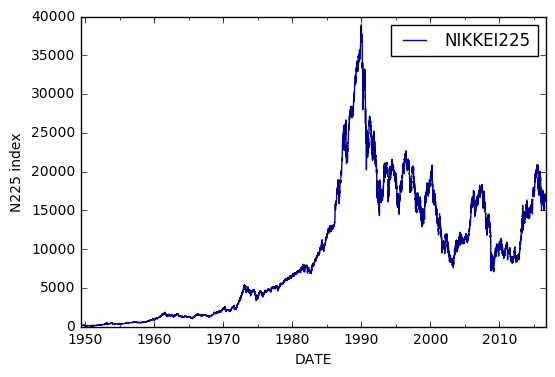

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
N225.plot(color='darkblue')
plt.ylabel('N225 index')

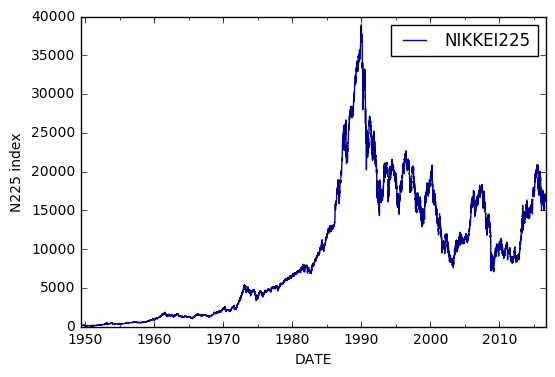

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
N225.plot(color='darkblue')
plt.ylabel('N225 index')
plt.show()

plt.show()を追加することにより出力の仕方が変わりました。

In [5]:
price = pdr.DataReader("^N225", 'yahoo',"1984/1/4",end)
price.head(1)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1984-01-04,9927.0,9927.0,9927.0,9927.0,0,9927.0


In [6]:
print(price.tail(1))

                    Open          High           Low         Close  Volume  \
Date                                                                         
2016-09-30  16474.449219  16497.550781  16407.779297  16449.839844  120700   

               Adj Close  
Date                      
2016-09-30  16449.839844  


## 4.2 データベースの加工

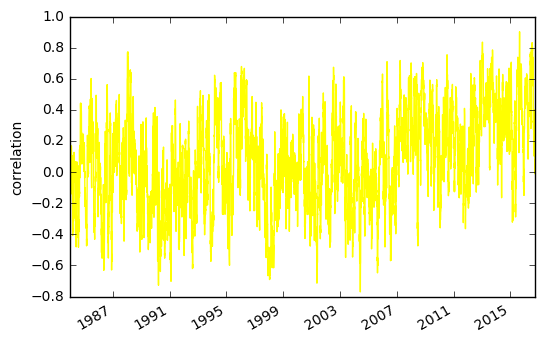

In [7]:
import pandas as pd
fx = pdr.DataReader('DEXJPUS',"fred",start,end)
port=pd.concat([price.Close,fx],axis=1).dropna()
n=port.Close.pct_change().dropna()
f=port.DEXJPUS.pct_change().dropna()
f.rolling(window=20).corr(n).plot(color="yellow")
plt.ylabel('correlation')

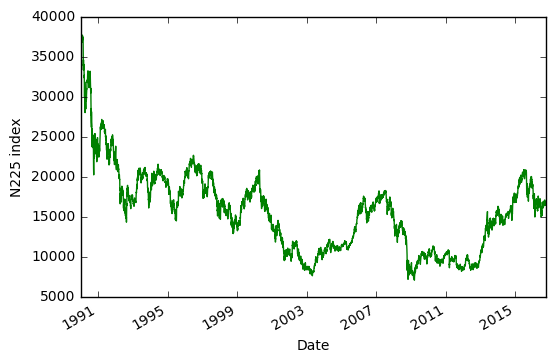

In [8]:
price = pdr.DataReader("^N225", 'yahoo',start,end)
price1=price.ix["1990/1/1":]
price1.Close.plot(color='green')
price2=price.ix["2015",0:2]
price2.tail(1)
plt.ylabel('N225 index')

In [9]:
print(price.resample('M').first().tail())

                    Open          High           Low         Close  Volume  \
Date                                                                         
2016-05-31  16357.099609  16357.099609  15975.469727  16147.379883  174500   
2016-06-30  17097.220703  17145.949219  16908.919922  16955.730469  129700   
2016-07-31  15698.019531  15765.000000  15635.570312  15682.480469  116300   
2016-08-31  16415.310547  16677.490234  16319.150391  16635.769531  168900   
2016-09-30  16885.160156  16941.179688  16864.560547  16926.839844  127600   

               Adj Close  
Date                      
2016-05-31  16147.379883  
2016-06-30  16955.730469  
2016-07-31  15682.480469  
2016-08-31  16635.769531  
2016-09-30  16926.839844  


In [10]:
print(price.resample('M').last().tail())

                    Open          High           Low         Close  Volume  \
Date                                                                         
2016-05-31  17029.460938  17251.359375  16988.640625  17234.980469  152000   
2016-06-30  15752.709961  15781.690430  15575.919922  15575.919922  146200   
2016-07-31  16359.679688  16679.189453  16174.349609  16569.269531  227600   
2016-08-31  16857.830078  16917.859375  16836.960938  16887.400391  145800   
2016-09-30  16474.449219  16497.550781  16407.779297  16449.839844  120700   

               Adj Close  
Date                      
2016-05-31  17234.980469  
2016-06-30  15575.919922  
2016-07-31  16569.269531  
2016-08-31  16887.400391  
2016-09-30  16449.839844  


In [11]:
print(price.resample('M',loffset='1d').last().tail())

                    Open          High           Low         Close  Volume  \
Date                                                                         
2016-06-01  17029.460938  17251.359375  16988.640625  17234.980469  152000   
2016-07-01  15752.709961  15781.690430  15575.919922  15575.919922  146200   
2016-08-01  16359.679688  16679.189453  16174.349609  16569.269531  227600   
2016-09-01  16857.830078  16917.859375  16836.960938  16887.400391  145800   
2016-10-01  16474.449219  16497.550781  16407.779297  16449.839844  120700   

               Adj Close  
Date                      
2016-06-01  17234.980469  
2016-07-01  15575.919922  
2016-08-01  16569.269531  
2016-09-01  16887.400391  
2016-10-01  16449.839844  


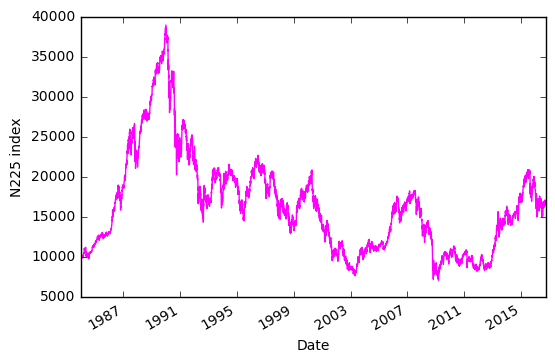

In [12]:
price.resample('A').Close.plot(color='magenta')
plt.ylabel('N225 index')

## 4.3 データの加工、分析


In [13]:
import numpy as np
dp=np.log(price.Close).diff()
vol=dp.std()*np.sqrt(250)
print(vol,len(price))

0.230959043251 8064


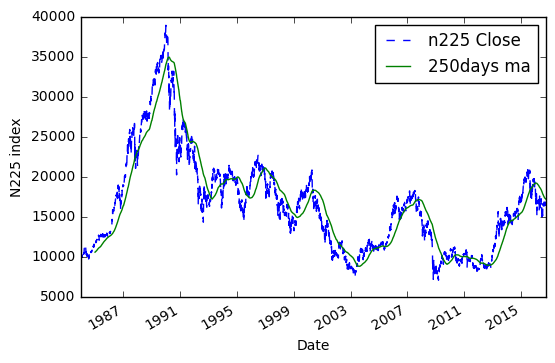

In [14]:
import pandas as pd
ma=pd.Series.rolling(price.Close,window=250).mean()
price.Close.plot(label='n225 Close',style='--')
ma.plot(label='250days ma')
plt.ylabel('N225 index')
plt.legend()

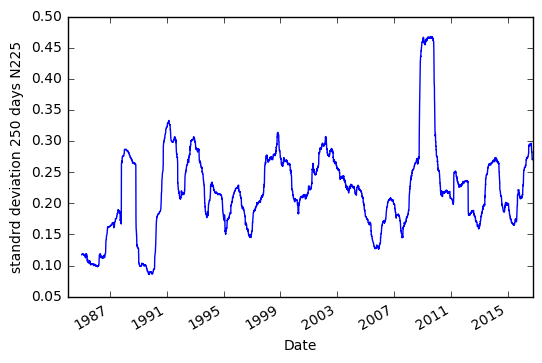

In [15]:
(pd.Series.rolling(np.log(price.Close).diff().dropna(),window=250).std()*np.sqrt(250))\
.plot()
plt.ylabel('standrd deviation 250 days N225')